In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df=pd.read_csv("House_Price_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Plot Area,Ready To Move,Bani Gala Islamabad,4 BHK,Bani Gala,1856,4.0,3.0,250.0
1,Flat,Ready To Move,F-11 Islamabad,5 BHK,Islamabad,1745,3.0,3.0,679.0
2,Flat,Ready To Move,E-11 Islamabad,2 BHK,Islamabad,745,3.0,3.0,69.0
3,Plot Area,Ready To Move,Bani Gala Islamabad,4 BHK,Bani Gala,1856,4.0,3.0,250.0
4,Flat,Ready To Move,F-11 Islamabad,5 BHK,Islamabad,1745,3.0,3.0,679.0


In [3]:
df.shape

(14323, 9)

In [4]:
df.describe()

,bath,balcony,price
count,14247.000000,13711.000000,14320.000000
mean,2.739664,1.685581,124.804340
std,1.311763,0.868004,161.009786
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.257500
50%,2.000000,2.000000,75.000000
75%,3.000000,2.000000,130.000000
max,40.000000,3.000000,3600.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14323 entries, 0 to 14322
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     14322 non-null  object 
 1   availability  14320 non-null  object 
 2   location      14319 non-null  object 
 3   size          14304 non-null  object 
 4   society       8818 non-null   object 
 5   total_sqft    14320 non-null  object 
 6   bath          14247 non-null  float64
 7   balcony       13711 non-null  float64
 8   price         14320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 1007.2+ KB


In [6]:
df1=df
df1.shape

(14323, 9)

In [7]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Plot Area,Ready To Move,Bani Gala Islamabad,4 BHK,Bani Gala,1856,4.0,3.0,250.0
1,Flat,Ready To Move,F-11 Islamabad,5 BHK,Islamabad,1745,3.0,3.0,679.0
2,Flat,Ready To Move,E-11 Islamabad,2 BHK,Islamabad,745,3.0,3.0,69.0
3,Plot Area,Ready To Move,Bani Gala Islamabad,4 BHK,Bani Gala,1856,4.0,3.0,250.0
4,Flat,Ready To Move,F-11 Islamabad,5 BHK,Islamabad,1745,3.0,3.0,679.0


In [8]:
df1.groupby('area_type')['area_type'].agg('count')


area_type
Built-up  Area          2488
Carpet  Area              87
Flat                     539
Penthouse                  1
Plot  Area              2417
Super built-up  Area    8790
Name: area_type, dtype: int64

In [9]:
df2=df1.drop(["area_type","society","availability","balcony"],axis=1)
df2.shape

(14323, 5)

In [10]:
df2.head()

,location,size,total_sqft,bath,price
0,Bani Gala Islamabad,4 BHK,1856,4.0,250.0
1,F-11 Islamabad,5 BHK,1745,3.0,679.0
2,E-11 Islamabad,2 BHK,745,3.0,69.0
3,Bani Gala Islamabad,4 BHK,1856,4.0,250.0
4,F-11 Islamabad,5 BHK,1745,3.0,679.0


In [11]:
df2.isnull().sum()

location       4
size          19
total_sqft     3
bath          76
price          3
dtype: int64

In [12]:
df2.shape

(14323, 5)

In [13]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df3.shape

(14246, 5)

In [15]:
df3.head()

,location,size,total_sqft,bath,price
0,Bani Gala Islamabad,4 BHK,1856,4.0,250.0
1,F-11 Islamabad,5 BHK,1745,3.0,679.0
2,E-11 Islamabad,2 BHK,745,3.0,69.0
3,Bani Gala Islamabad,4 BHK,1856,4.0,250.0
4,F-11 Islamabad,5 BHK,1745,3.0,679.0


In [16]:
df3["BHK"]=df3["size"].apply(lambda x: int(x.split(' ')[0]))

C:\Users\Yahya\AppData\Local\Temp\ipykernel_6732\1652928532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["BHK"]=df3["size"].apply(lambda x: int(x.split(' ')[0]))


In [17]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Bani Gala Islamabad,4 BHK,1856,4.0,250.0,4
1,F-11 Islamabad,5 BHK,1745,3.0,679.0,5
2,E-11 Islamabad,2 BHK,745,3.0,69.0,2
3,Bani Gala Islamabad,4 BHK,1856,4.0,250.0,4
4,F-11 Islamabad,5 BHK,1745,3.0,679.0,5


In [18]:
df3["BHK"].unique()

array([ 4,  5,  2,  3,  6,  1,  8,  7, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [19]:
df3[df3["BHK"]>20]

,location,size,total_sqft,bath,price,BHK
1834,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4800,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [20]:
df3.total_sqft.unique()

array(['1856', '1745', '745', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
df3[~df3["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
99,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
204,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
219,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
248,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
271,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
514,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
653,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
764,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
777,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
788,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [23]:
df3.total_sqft.unique()

array(['1856', '1745', '745', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [24]:
def convert_sqf_to_number(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [25]:
convert_sqf_to_number('22222-2222')

12222.0

In [26]:
convert_sqf_to_number('22222')

22222.0

In [27]:
df4=df3.copy()

In [28]:
df4["total_sqft"]=df4["total_sqft"].apply(convert_sqf_to_number)
df4.head(31)

,location,size,total_sqft,bath,price,BHK
0,Bani Gala Islamabad,4 BHK,1856.0,4.0,250.0,4
1,F-11 Islamabad,5 BHK,1745.0,3.0,679.0,5
2,E-11 Islamabad,2 BHK,745.0,3.0,69.0,2
3,Bani Gala Islamabad,4 BHK,1856.0,4.0,250.0,4
4,F-11 Islamabad,5 BHK,1745.0,3.0,679.0,5
5,E-11 Islamabad,2 BHK,745.0,3.0,69.0,2
6,Bani Gala Islamabad,5 BHK,1856.0,4.0,260.0,5
7,F-11 Islamabad,5 BHK,1745.0,3.0,699.0,5
8,E-11 Islamabad,2 BHK,745.0,3.0,71.0,2
9,Bani Gala Islamabad,4 BHK,1856.0,4.0,260.0,4


In [29]:
(2100 + 2850)/2


2475.0

In [30]:
df4.loc[30]

location      E-11 Lahore
size                2 BHK
total_sqft          745.0
bath                  3.0
price                69.0
BHK                     2
Name: 30, dtype: object

In [31]:
df5=df4.copy()

In [32]:
df5["price_per_sqft"]=df5["price"]*100000/df5["total_sqft"]
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Bani Gala Islamabad,4 BHK,1856.0,4.0,250.0,4,13469.827586
1,F-11 Islamabad,5 BHK,1745.0,3.0,679.0,5,38911.174785
2,E-11 Islamabad,2 BHK,745.0,3.0,69.0,2,9261.744966
3,Bani Gala Islamabad,4 BHK,1856.0,4.0,250.0,4,13469.827586
4,F-11 Islamabad,5 BHK,1745.0,3.0,679.0,5,38911.174785


In [33]:
df5.location.unique()

array(['Bani Gala Islamabad', 'F-11 Islamabad', 'E-11 Islamabad', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [34]:
len(df5.location.unique())

1333

In [35]:
df5.location=df5.location.apply(lambda x: x.strip())


In [36]:
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                     535
Sarjapur  Road                 392
Electronic City                304
Kanakpura Road                 266
Thanisandra                    236
                              ... 
Kanakapura Road,                 1
Kanakapura main  Road            1
Karnataka Shabarimala            1
Kasthuri Nagar East Of NGEF      1
whitefiled                       1
Name: location, Length: 1322, dtype: int64

In [37]:
len(location_stats[location_stats>10])

270

In [38]:
location_less_than_10=location_stats[location_stats<=10]
location_less_than_10.head(500)

location
Nagadevanahalli             10
Naganathapura               10
Ganga Nagar                 10
Basapura                    10
Sadashiva Nagar             10
                            ..
Chokkanahalli                2
Race Course Road             2
Uday Nagar                   2
Chikku Lakshmaiah Layout     2
Kempapura                    2
Name: location, Length: 500, dtype: int64

In [39]:
len(df5.location.unique())

1322

In [40]:
df5.location=df5.location.apply(lambda x:"other" if x in location_less_than_10 else x)
df5.location.head(30)

0      Bani Gala Islamabad
1           F-11 Islamabad
2           E-11 Islamabad
3      Bani Gala Islamabad
4           F-11 Islamabad
5           E-11 Islamabad
6      Bani Gala Islamabad
7           F-11 Islamabad
8           E-11 Islamabad
9      Bani Gala Islamabad
10          F-11 Islamabad
11          E-11 Islamabad
12             DHA Karachi
13         Clifton Karachi
14        Defense  Karachi
15    Beharia Town Karachi
16        Sea view Karachi
17      Model Town Karachi
18             DHA Karachi
19         Clifton Karachi
20        Defense  Karachi
21    Beharia Town Karachi
22        Sea view Karachi
23      Model Town Karachi
24             E-11 Lahore
25       Model Town Lahore
26          Defense Lahore
27             E-11 Lahore
28       Model Town Lahore
29          Defense Lahore
Name: location, dtype: object

In [41]:
len(df5.location.unique())

271

In [42]:
df5.location.head(20)

0      Bani Gala Islamabad
1           F-11 Islamabad
2           E-11 Islamabad
3      Bani Gala Islamabad
4           F-11 Islamabad
5           E-11 Islamabad
6      Bani Gala Islamabad
7           F-11 Islamabad
8           E-11 Islamabad
9      Bani Gala Islamabad
10          F-11 Islamabad
11          E-11 Islamabad
12             DHA Karachi
13         Clifton Karachi
14        Defense  Karachi
15    Beharia Town Karachi
16        Sea view Karachi
17      Model Town Karachi
18             DHA Karachi
19         Clifton Karachi
Name: location, dtype: object

In [43]:
df5[df5.total_sqft/df5.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
67,Diplomatic Enclave Islamabad,3 BHK,805.0,3.0,359.0,3,44596.273292
68,G-10 Islamabad,2 BHK,545.0,2.0,100.0,2,18348.623853
78,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
114,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
127,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810


In [44]:
df5.shape

(14246, 7)

In [45]:
df6=df5[~(df5.total_sqft/df5.BHK<300)]
df6.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Bani Gala Islamabad,4 BHK,1856.0,4.0,250.0,4,13469.827586
1,F-11 Islamabad,5 BHK,1745.0,3.0,679.0,5,38911.174785
2,E-11 Islamabad,2 BHK,745.0,3.0,69.0,2,9261.744966
3,Bani Gala Islamabad,4 BHK,1856.0,4.0,250.0,4,13469.827586
4,F-11 Islamabad,5 BHK,1745.0,3.0,679.0,5,38911.174785


In [46]:
df6.shape

(13474, 7)

In [47]:
df6.price_per_sqft.describe()

count     13428.000000
mean       7171.627485
std        5880.365056
min         267.829813
25%        4290.236936
50%        5500.000000
75%        7500.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [48]:
def remove_outlier(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        sd=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-sd)) & (subdf.price_per_sqft<=(m+sd))] 
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [49]:
df7=remove_outlier(df6)

In [50]:
df7.shape

(11044, 7)

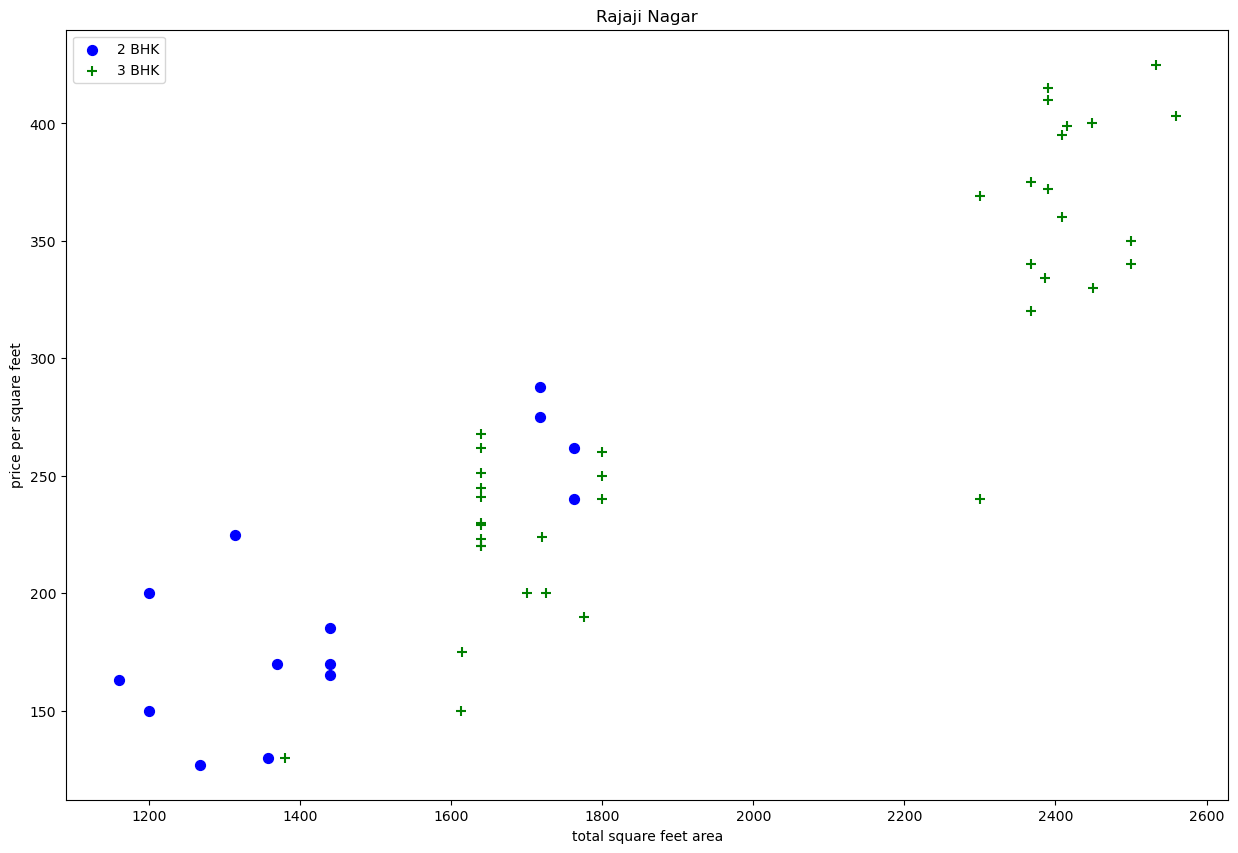

In [51]:
def scatter_plot(df,location):
    bhk2=df[(df.location==location) & (df.BHK==2)]
    bhk3=df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='3 BHK',s=50)
    plt.xlabel("total square feet area") 
    plt.ylabel("price per square feet") 
    plt.title(location)
    plt.legend()
scatter_plot(df7,"Rajaji Nagar")

In [52]:

def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby("location"):
        bhk_stats = {}
        for BHK, bhk_df in location_df.groupby("BHK"):
            bhk_stats[BHK] = {
                "mean": np.mean(bhk_df.price_per_sqft),
                "std": np.std(bhk_df.price_per_sqft),
                "count": bhk_df.shape[0]
            }

        for BHK, bhk_df in location_df.groupby("BHK"):
            stats = bhk_stats.get(BHK - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < stats["mean"]].index.values)

    return df.drop(exclude_indices, axis="index")

df8=remove_bhk_outliers(df7)
df8.shape                      

(8132, 7)

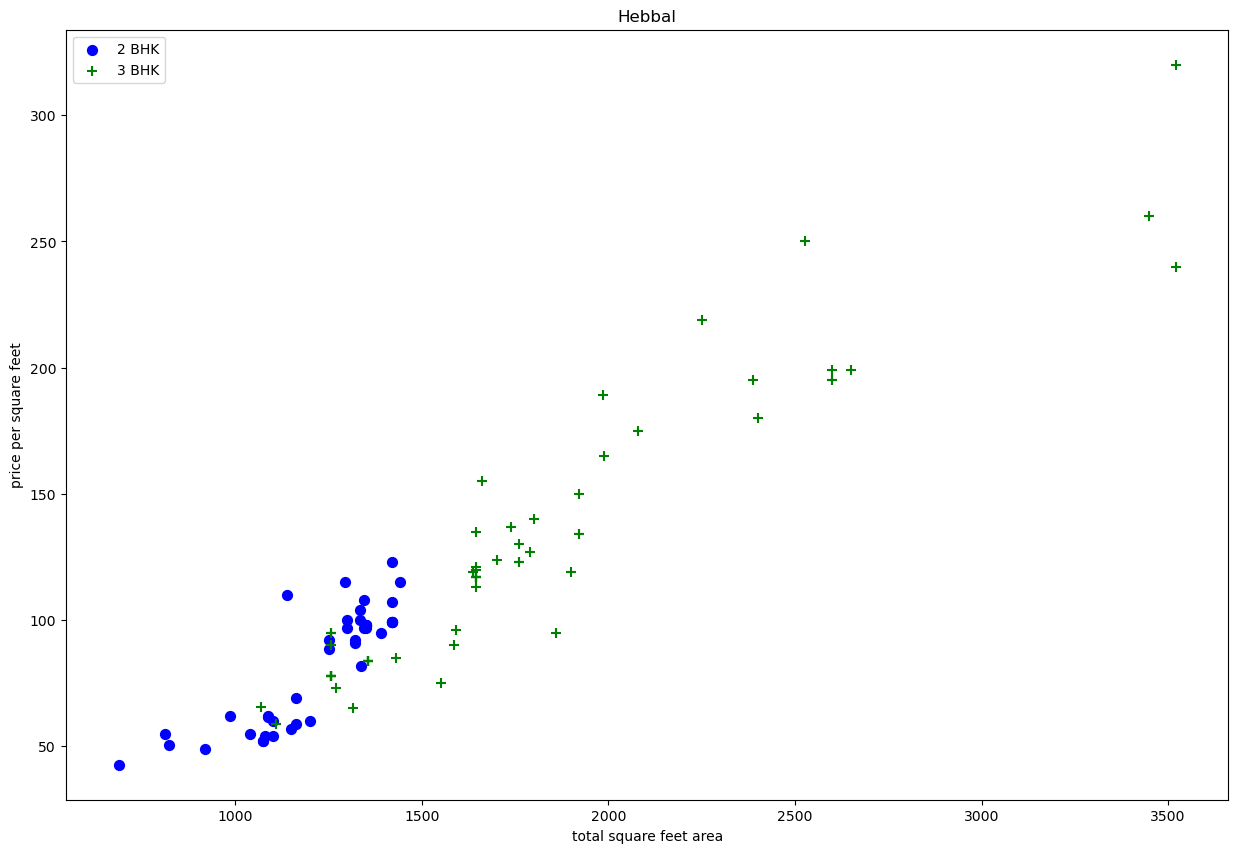

In [53]:
scatter_plot(df7,"Hebbal")

Text(0, 0.5, 'Count')

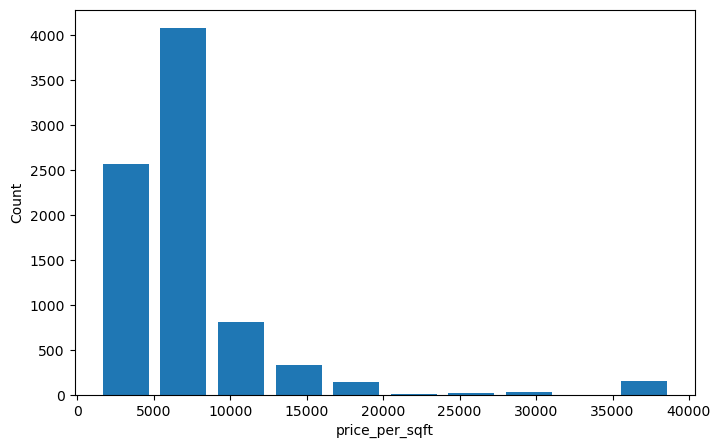

In [54]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(8,5)
plt.hist(df8.price_per_sqft,rwidth=.8)
plt.xlabel("price_per_sqft")
plt.ylabel("Count")

In [55]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [56]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5996,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
9247,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
9336,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
10069,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
10400,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

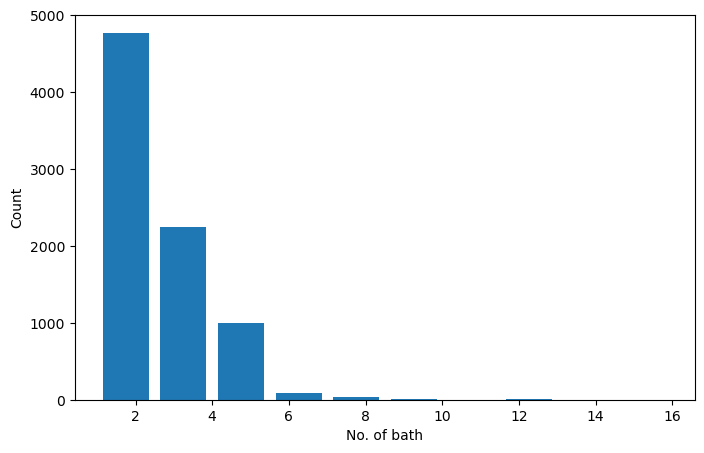

In [57]:
plt.hist(df8.bath,rwidth=.8)
plt.xlabel("No. of bath")
plt.ylabel("Count")

In [58]:
df8[df8.bath>df8.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1779,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5957,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
7472,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
9172,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [59]:
df9=df8[df8.bath<df8.BHK+2]
df9.shape

(8054, 7)

In [60]:
df10=df9.drop(["size","price_per_sqft"],axis="columns")
df10.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [61]:
df10.shape

(8054, 5)

In [62]:
dummies=pd.get_dummies(df10.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other,satellite Bahawalpur,satellite Town Bahawalpur
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11042,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [63]:
df11=pd.concat([df10,dummies.drop("other",axis=1)],axis=1)
df11

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,satellite Bahawalpur,satellite Town Bahawalpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11039,satellite Town Bahawalpur,745.0,3.0,50.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11040,satellite Town Bahawalpur,745.0,3.0,50.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11041,satellite Town Bahawalpur,745.0,3.0,50.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11042,satellite Town Bahawalpur,745.0,3.0,50.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [64]:
df12=df11.drop('location',axis=1)
df12.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,satellite Bahawalpur,satellite Town Bahawalpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [65]:
df12.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,satellite Bahawalpur,satellite Town Bahawalpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
X=df12.drop("price",axis=1)
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,satellite Bahawalpur,satellite Town Bahawalpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
Y=df12.price
Y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
11039     50.0
11040     50.0
11041     50.0
11042     50.0
11043     50.0
Name: price, Length: 8054, dtype: float64

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,random_state=5,test_size=0.2)

In [69]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [70]:
model.fit(X_train,Y_train)

LinearRegression()

In [71]:
model.score(X_test,Y_test)

0.918396643578328

In [73]:
# predict_price("F-11 Islamabad",2000,7,7)

In [74]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,random_state=5,test_size=.2)
val=cross_val_score(LinearRegression(),X,Y,cv=cv)
val

array([0.91839664, 0.93043041, 0.931361  , 0.94283324, 0.94185264])

In [75]:
np.mean(val)

0.9329747862936042

In [76]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model_using_GridSearchCV(X, Y):
    algo = {
        "Linear_Regression": {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        "decisiontree": {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ["mse", "friedman_mse"],  # corrected typo here
                'splitter': ['random', 'best']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=.2, random_state=0)
    for algo_name, config in algo.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=True)
        gs.fit(X, Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=["model", 'best_score', 'best_params'])

find_best_model_using_GridSearchCV(X, Y)


c:\Users\Yahya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Yahya\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Yahya\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Yahya\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Yahya\anaconda3\Lib\site-packages\

,model,best_score,best_params
0,Linear_Regression,0.933757,{}
1,lasso,0.689792,"{'alpha': 1, 'selection': 'cyclic'}"
2,decisiontree,0.884768,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [84]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=1:
        x[loc_index]=1
    return model.predict([x])[0]


In [85]:
predict_price("1st Block Jayanagar",2000,7,7)

c:\Users\Yahya\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


254.98515009966218

In [86]:
predict_price("F-11 Islamabad",2000,7,7)

c:\Users\Yahya\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


705.5442942974662

In [87]:
predict_price("1st Block Jayanagar",2000,7,5)

c:\Users\Yahya\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


259.04704919381356

In [88]:
predict_price("1st Block Jayanagar",200,7,5)

c:\Users\Yahya\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


109.38082560228456

In [89]:
df8.head(100)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
104,7th Phase JP Nagar,3 BHK,1680.0,3.0,120.0,3,7142.857143
105,7th Phase JP Nagar,2 BHK,980.0,2.0,69.0,2,7040.816327
106,7th Phase JP Nagar,2 BHK,1180.0,2.0,72.0,2,6101.694915
110,7th Phase JP Nagar,3 BHK,1400.0,3.0,115.0,3,8214.285714


In [90]:
predict_price("1st Block Jayanagar",300,7,5)

c:\Users\Yahya\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


117.69561580181396

In [91]:
import pickle
with open("house_price_prediction.pickle","wb") as f:
    pickle.dump(model,f)

In [92]:
import json
columns={
    "data_columns":[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))